In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = datasets.load_iris()


In [10]:

# Verifico la información contenida en el dataset
print('Información en el dataset: ' )
print(data.keys())


Información en el dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:

# Verifico las características del dataset
print('Características del dataset:')
print(data.DESCR)


Características del dataset:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== =

# Creación del Dataset

In [12]:

df_iris = pd.DataFrame(data= data.data, columns=data.feature_names)
df_iris['target'] = data.target
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:

#Verifico la cantidad de datos que contiene el dataset
print('Cantidad de datos: ')
df_iris.shape


Cantidad de datos: 


(150, 5)

# Exploración de Datos

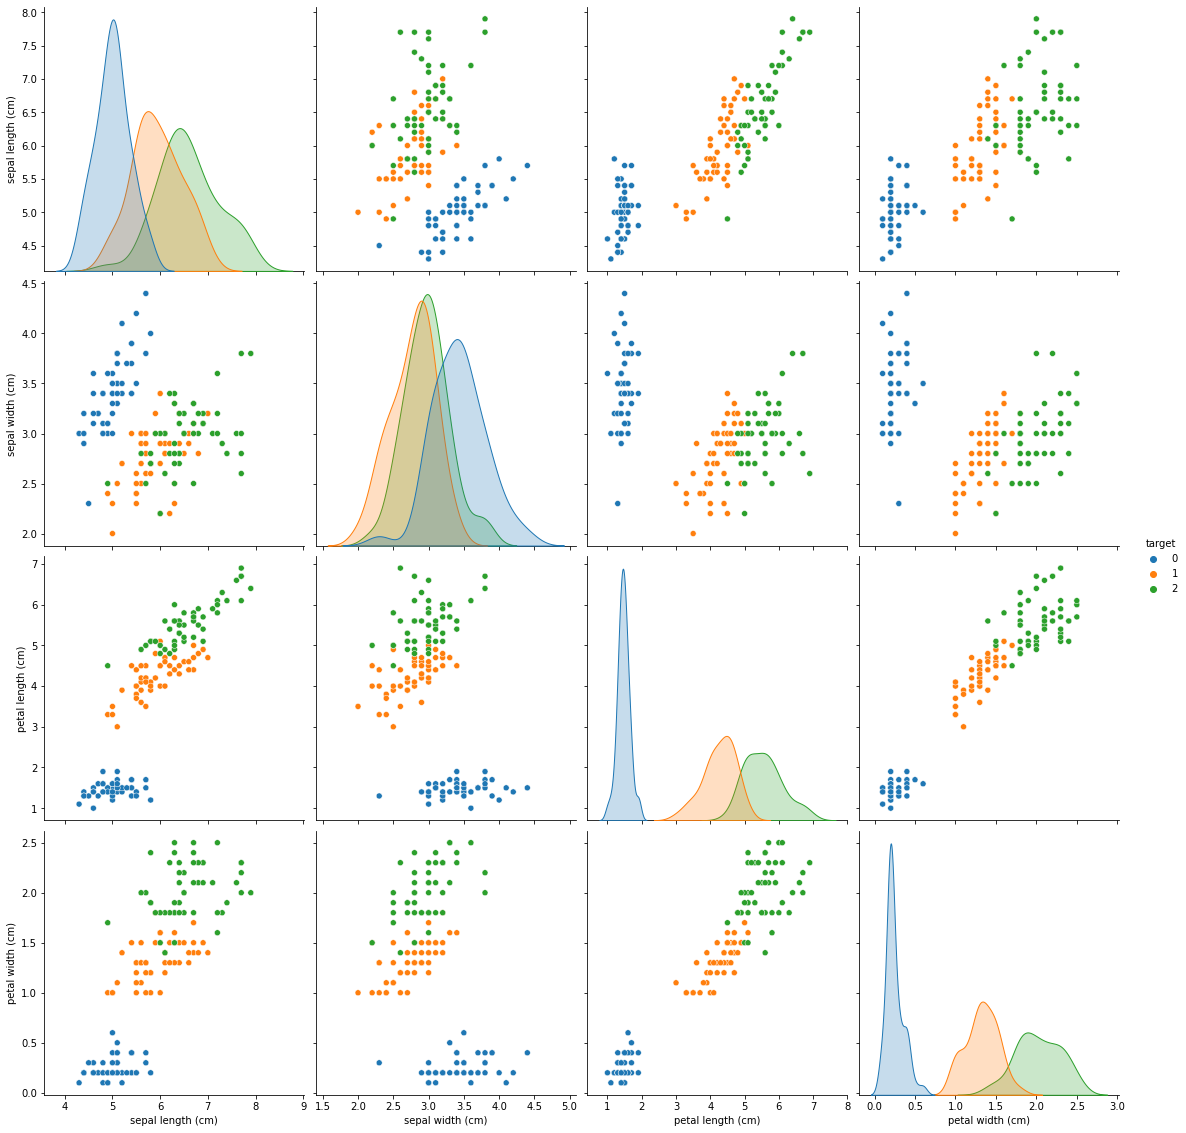

In [15]:

#Con la siguiente gráfica podemos evaluar que variables seleccionar
sns.pairplot(df_iris,hue='target',height=4, palette='tab10')
plt.show()


In [ ]:
#Vemos que en las dos últimas no se solapan tanto los datos, lo cuál nos sirve para el modelo.

# Selección de Datos

In [16]:

#Seleccionamos las características que vamos a considerar para crear el modelo
x = df_iris[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']]
y = df_iris[['target']]


# División de datos

In [17]:

# Dividimos los datos de "entrenamiento" en entrenamiento y prueba para probar los algoritmos
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 , random_state=0)


# Creación del modelo de Clasificación:

In [18]:

#Creamos modelo de clasificación
clf = DecisionTreeClassifier(random_state=0, max_depth=2)#max_depth es la profundidad del arbol
#Ajustamos modelo
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

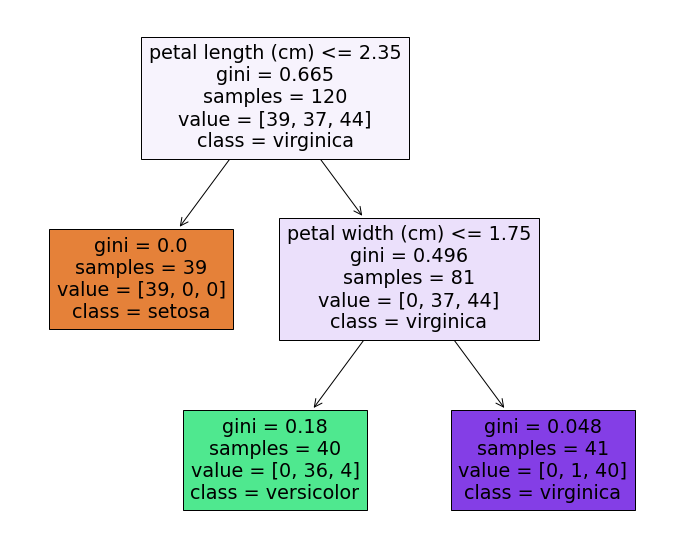

In [20]:

#Mostramos resultado
fig = plt.figure(figsize=(12,10))
_ = tree.plot_tree(clf,feature_names=x.columns, class_names=data.target_names, filled=True)


# Predicción del conjunto de datos de prueba

In [22]:

#Una vez creado el modelo, vamos a predecir con los datos obtenidos:
y_pred = clf.predict(x_test)


# Validación de Resultados

In [23]:

df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()


,Valor Real,Valor Predicho
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


# Matriz de Confusión

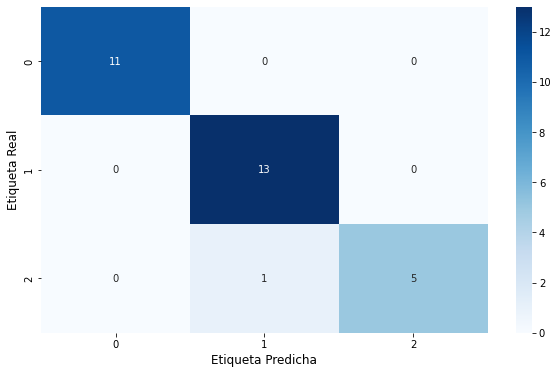

In [24]:

cf_matrix = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax )#annot sirve para incluir datos dentro de los recuadros
shm.set_xlabel('Etiqueta Predicha', fontsize=12) #la que predice el modelo
shm.set_ylabel('Etiqueta Real', fontsize=12)#la que nosotros hemos predicho
plt.show()


# Métricas

In [26]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



# Conclusión:

 Este modelo nos ha resultado bastante bueno, podemos ver que la relación de las variables seleccionadas nos aproxima mucho al resultado deseado que en este caso sería 1.